<a href="https://colab.research.google.com/github/TheMLEngineer/FasiAI-Book/blob/main/Chapter_2_(From_Model_to_Production).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.0

     |████████████████████████████████| 358kB 16.6MB/s 
     |████████████████████████████████| 61kB 11.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import fastai 
print(fastai.__version__ ) 

2.0.0


In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 20.1MB/s 
     |████████████████████████████████| 194kB 50.7MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.2MB 43.1MB/s 
Mounted at /content/gdrive


In [4]:
from fastbook import *

In [5]:
from fastai.vision.widgets import *

In [6]:
# bING sEARCH api url : https://www.microsoft.com/en-us/bing/apis/bing-image-search-api

In [7]:
# Faster ETL using FASTAI Blog URL : https://medium.com/nvidia-merlin/faster-gpu-based-feature-engineering-and-tabular-deep-learning-training-with-nvtabular-on-kaggle-com-9791fa2f4b61

In [8]:
!pip install bing-image-downloader

In [9]:
from bing_image_downloader import downloader
downloader.download('grizzly bear', limit=150,  output_dir='bears', adult_filter_off=True, force_replace=False, timeout=60)




[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.mangelsen.com/media/wysiwyg/Misc_LandingPages/151027eMeetGrizzly399_04.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.funnyalltime.com/wp-content/uploads/2012/08/Scary-face-03.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://ww1.prweb.com/prfiles/2010/07/13/2660944/gI_0_DougAndBart4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://3dprint.com/wp-content/uploads/2014/11/bear3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.wallpapers13.com/wp-content/uploads/2016/04/Cheetahs-cubs-and-big-cats-predators-HD-Wallpaper-3840x2400-1024x768.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.nps.gov/gaar/planyourvisit/images/bigbeartracks2.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://weneedfun.com/wp-content/uploads/2016/08/Brazilian-Wandering-Spider-162.jpg
[%] File Downloaded !

[%] D

In [10]:
dest = '/content/bears/grizzly bear/Image_102.jpg'

In [11]:
from fastai.vision import *
import torchvision.transforms as T

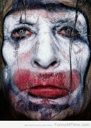

In [12]:
im = Image.open(dest)
im.to_thumb(128 , 128)

In [13]:
# Walk With FAST AI URL : https://walkwithfastai.com/Segmentation

In [14]:
# https://course.fast.ai/images#DuckDuckGo

In [15]:
# We can use duck duck go also

In [16]:
def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

In [17]:
urls = search_images_ddg('grizzly bear' , max_n= 100)
len(urls),urls[0]

(100,
 'https://www.wildernesscommittee.org/sites/default/files/2018-05/grizzly_bear.jpg')

In [18]:
from fastbook import *

In [19]:
import os
if not os.path.exists('/content/images'): 
  os.mkdir('/content/images')

In [20]:
# Make a folder name : images , in this same notebook directory

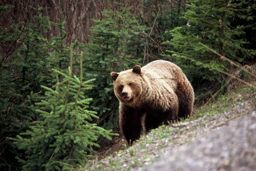

In [21]:
download_url(urls[0], 'images/bear.jpg')
im = Image.open('images/bear.jpg')
im.thumbnail((256,256))
im

In [22]:
bear_types = 'grizzly' , 'black' , 'teddy'

In [23]:
path = Path('bears')

In [24]:
# Using custom duck duck go image search function

In [25]:
#!/usr/bin/python
# -*- coding: utf-8 -*-


def search_images_ddg(key, max_n=200):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """

    url = 'https://duckduckgo.com/'
    params = {'q': key}
    res = requests.post(url, data=params)
    searchObj = re.search(r'vqd=([\d-]+)\&', res.text)
    if not searchObj:
        print('Token Parsing Failed !')
        return
    requestUrl = url + 'i.js'
    headers = \
        {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
    params = (
        ('l', 'us-en'),
        ('o', 'json'),
        ('q', key),
        ('vqd', searchObj.group(1)),
        ('f', ',,,'),
        ('p', '1'),
        ('v7exp', 'a'),
        )
    urls = []
    while True:
        try:
            res = requests.get(requestUrl, headers=headers,
                               params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                max_n = max_n - 1
                if max_n < 1:  # dedupe
                    return L(set(urls))
            if 'next' not in data:
                return L(set(urls))
            requestUrl = url + data['next']
        except:
            pass


In [26]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok = True)
    results = search_images_ddg(f'{o} bear')
    print(results)
    download_images(dest)

In [27]:
fns = get_image_files(path)

In [28]:
fns

(#150) [Path('bears/grizzly bear/Image_147.jpg'),Path('bears/grizzly bear/Image_88.jpg'),Path('bears/grizzly bear/Image_70.jpg'),Path('bears/grizzly bear/Image_64.jpg'),Path('bears/grizzly bear/Image_73.jpg'),Path('bears/grizzly bear/Image_57.jpg'),Path('bears/grizzly bear/Image_75.jpg'),Path('bears/grizzly bear/Image_129.jpg'),Path('bears/grizzly bear/Image_127.jpg'),Path('bears/grizzly bear/Image_69.jpg')...]

In [29]:
# Check if any corrupt image files 


In [30]:
failed = verify_images(fns)

In [31]:
failed

(#0) []

In [32]:
# Here now it is zero , If any images there we can unlink it by this

In [33]:
failed.map(Path.unlink)

(#0) []

In [34]:
# Open short description and source code
?? verify_images

In [35]:
# Open short description 
? verify_images

In [36]:

%debug
# Open Python debugger

ERROR:root:No traceback has been produced, nothing to debug.


In [37]:
# From Data to Data Loaders

In [38]:
bears = DataBlock(
    
    blocks = (ImageBlock , CategoryBlock) , 
    get_items = get_image_files , 
    splitter = RandomSplitter(valid_pct = 0.2 , seed = 42) , 
    get_y = parent_label , 
    item_tfms = Resize(128)

)

In [39]:
bears

In [40]:
path

Path('bears')

In [41]:
dls = bears.dataloaders(path)

In [42]:
dls

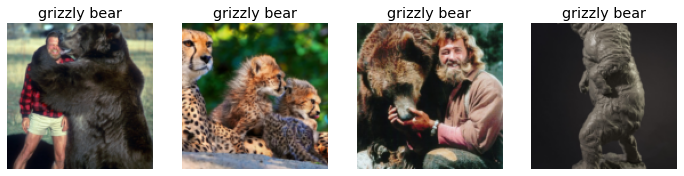

In [43]:
dls.valid.show_batch(max_n = 4 , nrows = 1)

In [44]:
# Resize with Squish

In [45]:
bears = bears.new(item_tfms= Resize(128 , ResizeMethod.Squish))
bears

In [46]:
dls = bears.dataloaders(path)
dls

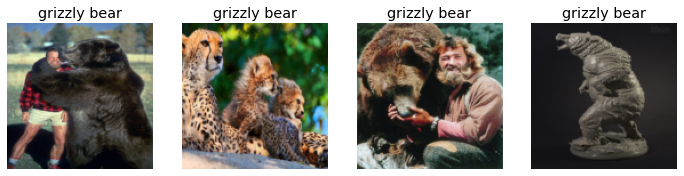

In [47]:
dls.valid.show_batch(max_n = 4 , 
                     nrows = 1)

In [48]:
# Resize using padded zeros

In [49]:
bears = bears.new(item_tfms= Resize(128 , 
                                    ResizeMethod.Pad , 
                                    pad_mode = 'zeros'))
bears

In [50]:
dls = bears.dataloaders(path)

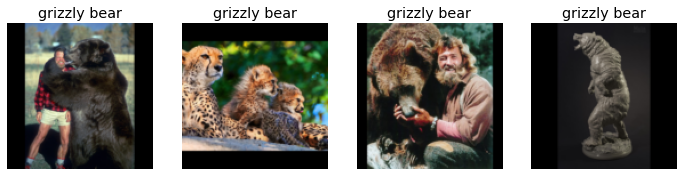

In [51]:
dls.valid.show_batch(max_n = 4 , 
                     nrows = 1)

In [52]:
bears = bears.new(item_tfms = RandomResizedCrop(128 , 
                                                min_scale = 0.3))
bears

In [53]:
dls = bears.dataloaders(path)
dls

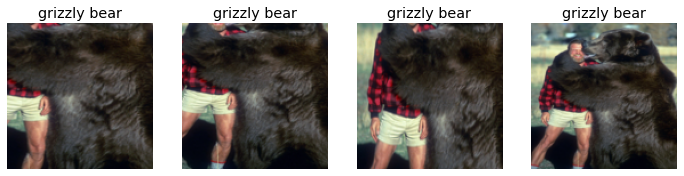

In [54]:
dls.train.show_batch(max_n = 4 , 
                     nrows = 1 , 
                     unique = True)

# Data Agumentation

In [55]:
bears = bears.new(item_tfms= Resize(128) , 
                  batch_tfms = aug_transforms(mult = 2))
bears

In [56]:
dls = bears.dataloaders(path)

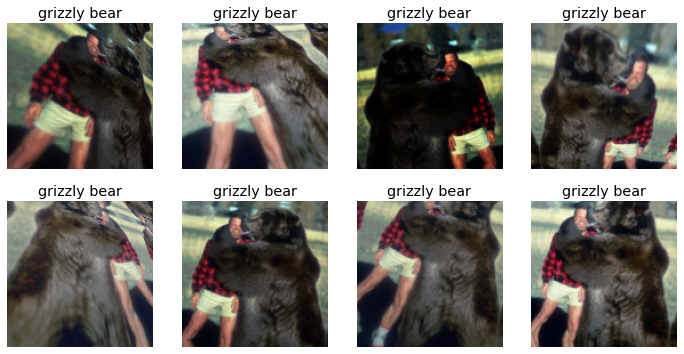

In [57]:
dls.train.show_batch(max_n = 8 , 
                     nrows = 2 , 
                     unique = True)

# Training your model and using it to clean your data

In [58]:
bears = bears.new(
    item_tfms = RandomResizedCrop(224 , min_scale= 0.5),
    batch_tfms = aug_transforms()
)

In [59]:
'''bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())'''

'bears = bears.new(\n    item_tfms=RandomResizedCrop(224, min_scale=0.5),\n    batch_tfms=aug_transforms())'

In [60]:
dls = bears.dataloaders(path)

In [61]:
learn = cnn_learner(dls , 
                    resnet18 , 
                    metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [62]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:03
1,0.000000,0.000000,0.000000,00:03
2,0.000000,0.000000,0.000000,00:03
3,0.000000,0.000000,0.000000,00:03


In [63]:
# Confusion Matrix

In [64]:
interp = ClassificationInterpretation.from_learner(learn)

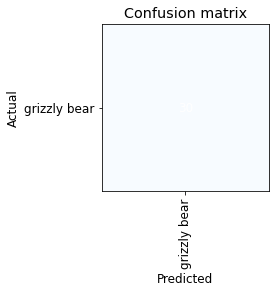

In [65]:
interp.plot_confusion_matrix()

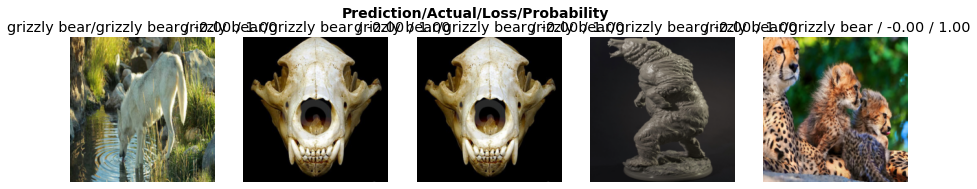

In [66]:
interp.plot_top_losses(5 ,     nrows = 1)

In [67]:
cleaner = ImageClassifierCleaner(learn)

In [68]:
cleaner

In [69]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

In [70]:
for idx , cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]) , path / cat)

In [71]:
learn.export()

In [72]:
path = Path()
path

Path('.')

In [73]:
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [74]:
learn_inf = load_learner(path / 'export.pkl')

In [75]:
learn_inf.predict('/content/bears/grizzly bear/Image_1.jpg')

('grizzly bear', tensor(0), tensor([1.]))

In [76]:
learn_inf.dls.vocab

['grizzly bear']

In [77]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

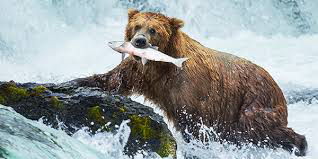

In [79]:
img = PILImage.create(btn_upload.data[-1])
img

In [80]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128 , 128))

out_pl

Output()

In [81]:
pred , pred_idx , probs = learn_inf.predict(img)

In [82]:
pred , pred_idx , probs

('grizzly bear', tensor(0), tensor([1.]))

In [83]:
lbl_pred = widgets.Label()

In [84]:
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx] : .04f}'

In [85]:
lbl_pred

Label(value='Prediction: grizzly bear; Probability:  1.0000')

In [86]:
btn_run = widgets.Button(description = 'Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [87]:
type(out_pl)

ipywidgets.widgets.widget_output.Output

In [88]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl : display(img.to_thumb(128 , 128))
  pred , pred_idx , probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04}'

In [89]:
btn_run.on_click(on_click_classify)

In [90]:
VBox([widgets.Label('Select your bear!') , 
     btn_upload , 
     btn_run , 
     out_pl , 
     lbl_pred])